In [1]:
import plotly

In [2]:
plotly.tools.set_credentials_file(username='YourUsername', api_key='APIKey')

In [3]:
#Plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py
#cufflinks imports
import cufflinks as cf

#data science imports
import pandas as pd
import numpy as np

%matplotlib inline
#option for pandas 
pd.options.display.max_columns=50

#display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [5]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)

#setting global theme
cf.set_config_file(world_readable=True, theme='space')

,claps,days_since_publication,fans,link,num_responses,publication,published_date,read_ratio,read_time,reads,started_date,tags,text,title,title_word_count,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
131,2,599.051993,2,https://medium.com/p/screw-the-environment-but...,0,None,2017-06-10 14:25:00,42.17,7,70,2017-06-10 14:24:00,"[Climate Change, Economics]","Screw the Environment, but Consider Your Walle...","Screw the Environment, but Consider Your Wallet",8,published,166,1859,0.001076,0,0,0,0,0,0
128,18,591.734033,3,https://medium.com/p/the-vanquishing-of-war-pl...,0,None,2017-06-17 22:02:00,29.51,14,54,2017-06-17 22:02:00,"[Climate Change, Humanity, Optimism, History]","The Vanquishing of War, Plague and Famine Part...","The Vanquishing of War, Plague and Famine",8,published,183,3891,0.004626,0,0,0,0,0,0
130,51,579.114155,20,https://medium.com/p/capstone-project-mercedes...,0,None,2017-06-30 12:55:00,19.98,42,224,2017-06-30 12:00:00,"[Machine Learning, Python, Udacity, Kaggle]",Capstone Project: Mercedes-Benz Greener Manufa...,Capstone Project: Mercedes-Benz Greener Manufa...,7,published,1121,12025,0.004241,0,0,0,0,1,1
122,0,578.271550,0,https://medium.com/p/home-of-the-scared-5af0fe...,0,None,2017-07-01 09:08:00,35.85,9,19,2017-06-30 18:21:00,"[Politics, Books, News, Media Criticism]",Home of the Scared A review of A Culture of Fe...,Home of the Scared,4,published,53,2533,0.000000,0,0,0,0,0,0
129,0,574.283903,0,https://medium.com/p/the-triumph-of-peace-f485...,0,None,2017-07-05 08:51:00,8.33,14,5,2017-07-03 20:18:00,"[Books, Psychology, History, Humanism]",The Triumph of Peace A review of The Better An...,The Triumph of Peace,4,published,60,3892,0.000000,1,0,0,0,0,0


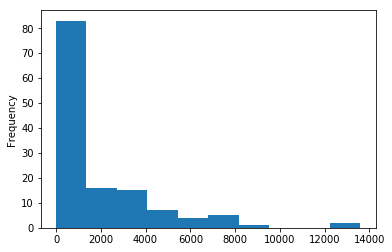

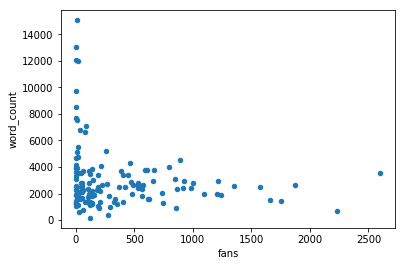

In [14]:
df = pd.read_parquet('https://github.com/WillKoehrsen/Data-Analysis/blob/master/medium/data/medium_data_2019_01_28?raw=true')
df.head()

_ = df['claps'].plot.hist()
_ = df.plot(x='fans', y='word_count', kind='scatter')

Histograms

In [20]:
df['claps'].iplot(
    kind='hist',
    bins=50,
    xTitle='claps',
    linecolor='black',
    yTitle='count',
    title='Claps Distribution')

Percentage Histogram

In [21]:
df['claps'].iplot(
    kind='hist',
    bins=50,
    xTitle='reads',
    linecolor='black',
    histnorm='percent',
    yTitle='percentage(%)',
    title='Reads Distribution in percentage')

Grouped Histogram

In [23]:
def to_time(dt):
    return dt.hour + dt.minute /60

In [25]:
df['time_started'] = df['started_date'].apply(to_time)
df['time_published'] = df['published_date'].apply(to_time)

df[['time_started', 'time_published']].iplot(
    kind= 'hist',
    linecolor='black',
    bins=24,
    histnorm='percent',
    bargap= 0.1,
    opacity = 0.8,
    barmode = 'group',
    xTitle= 'Time of day',
    yTitle= '(%) of Articles',
    title = 'Time Started and Time Published')

Overlaid Histogram

In [26]:
df[['time_published', 'time_started']].iplot(
    kind='hist',
    bins=24,
    linecolor='black',
    opacity=0.8,
    histnorm ='percent',
    barmode = 'overlay',
    xTitle = 'Time of day',
    yTitle = '(%) of Articles',
    title = 'Time Started and Time published overlaid')

In [27]:
df.groupby('publication').count()['fans'].iplot(
    kind='bar', yTitle='Number of Articles', linecolor='black', title='Articles by publications')

In [28]:
df[[c for c in df if '<tag>' in c]].sum().iplot(
    kind='bar',
    xTitle='Tag',
    yTitle='Number of articles with Tag',
    title='Frequency with tags',
    linecolor='black',
    sortbars=True)


Bar Plot with Two Categories

In [30]:
df2 = df[['views', 'reads',
          'published_date']].set_index('published_date').resample('M').mean()
df2.head()

,views,reads
published_date,,
2017-06-30,490.0,116.000000
2017-07-31,5764.0,1266.333333
2017-08-31,6691.5,1072.900000
2017-09-30,2286.0,302.000000
2017-10-31,NaN,NaN


In [31]:
df2.iplot(
    kind='bar',
    xTitle='Date',
    yTitle='Average',
    title='Monthly Average Views and Reads')

Bar Plot with Second Variable

In [32]:
df2 = df[['views', 'read_time',
          'published_date']].set_index('published_date').resample('M').mean()

df2.iplot(
    kind='bar',
    xTitle='Date',
    secondary_y='read_time',
    secondary_y_title='Average Read time',
    yTitle='Average Views',
    title='Monthly Averages')

Boxplot

In [33]:
df[['claps','fans']].iplot(secondary_y='fans', secondary_y_title='Fans',
                          kind='box', yTitle='Claps', title='Box plot of Claps and Fans')

Boxplot with Different Categories

In [34]:
df2= df.pivot(
    columns= 'publication', values='fans')
df2.head()

publication,Engineering @ Feature Labs,None,Noteworthy - The Journal Blog,Towards Data Science
0,NaN,3.0,NaN,NaN
1,NaN,83.0,NaN,NaN
2,NaN,0.0,NaN,NaN
3,NaN,4.0,NaN,NaN
4,NaN,1.0,NaN,NaN


In [36]:
df2.iplot(
        kind='box',
        layout=dict(
            height=600,
            yaxis=dict(title='fans'),
            title='Fans by publication',
            margin=dict(b=140)))

In [38]:
df[df['read_time'] <= 10].pivot(
    columns='read_time', values='reads').iplot(
        kind='box',
        colorscale='set2',
        xTitle='Read Time',
        yTitle='Number of reads',
        title='Box Plot of Reads by reading time')

Time Series

In [40]:
tds = df[df['publication']=='Towards Data Science'].set_index(
    'published_date')

tds.head()

,claps,days_since_publication,fans,link,num_responses,publication,read_ratio,read_time,reads,started_date,tags,text,title,title_word_count,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python,time_started,time_published
published_date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-27 11:20:00,4910,399.180265,892,https://towardsdatascience.com/random-forest-i...,29,Towards Data Science,17.68,21,31076,2017-12-26 15:11:00,"[Machine Learning, Data Science, Random Forest...",Random Forest in Python A Practical End-to-End...,Random Forest in Python,4,published,175724,4494,1.092568,0,0,1,0,1,1,15.183333,11.333333
2018-01-06 20:15:00,868,388.808491,121,https://towardsdatascience.com/improving-rando...,6,Towards Data Science,22.78,17,7916,2018-01-03 21:38:00,"[Machine Learning, Python, Data Science, Learn...",Improving the Random Forest in Python Part 1 G...,Improving the Random Forest in Python Part 1,8,published,34743,3504,0.247717,2,0,1,0,1,1,21.633333,20.250000
2018-01-07 20:37:00,186,387.793373,45,https://towardsdatascience.com/data-science-a-...,1,Towards Data Science,28.18,15,797,2018-01-07 13:18:00,"[Data Science, Data, Weight Loss, Programming]",Data Science: A Personal Application Charting ...,Data Science: A Personal Application,5,published,2828,3569,0.052115,0,0,1,0,0,0,13.300000,20.616667
2018-01-08 16:58:00,120,386.945411,44,https://towardsdatascience.com/a-theory-of-pre...,2,Towards Data Science,31.01,11,773,2018-01-02 17:23:00,"[Statistics, Data Science, Book Review, Books]",A Theory of Prediction Review of The Signal an...,A Theory of Prediction,4,published,2493,2817,0.042599,5,0,1,0,0,0,17.383333,16.966667
2018-01-09 21:49:00,2100,385.743489,417,https://towardsdatascience.com/hyperparameter-...,13,Towards Data Science,23.98,12,27835,2018-01-09 12:26:00,"[Machine Learning, Python, Data Science, Data]",Hyperparameter Tuning the Random Forest in Pyt...,Hyperparameter Tuning the Random Forest in Python,7,published,116063,2456,0.855049,0,0,1,0,1,1,12.433333,21.816667


In [47]:
tds['read_time'].iplot(
    mode='lines+markers',
    opacity=0.8,
    size=5,
    symbol=3,
    xTitle='Date',
    yTitle='Read Time(min)',
    title='Read Time trends')

In [ ]:
Two variables Time-Series

In [51]:
tds[['claps','fans']].iplot(
    mode='lines+markers',
    opacity=1,
    size=5,
    symbol=3,
    xTitle='Date',
    yTitle='Fans and Claps',
    title='Fans and Claps over time')

In [ ]:
Two Variables Time-Series with Secondary Y axis

In [53]:
tds[['fans', 'word_count', 'title']].iplot(
    y='fans',
    mode='lines+markers',
    secondary_y='word_count',
    secondary_y_title='Word Count',
    opacity=0.8,
    size=5,
    symbol=3,
    xTitle='Date',
    yTitle='Claps',
    title='Fans and Claps over time')

Text Annotations

In [55]:
tds_monthly_totals = tds.resample('M').sum()

tds_monthly_totals['text']=[
    f'<span style="color:blue">{m}<span><br>words: {w:.0f}'
    for m, w in zip(tds_monthly_totals.index.month_name(),
                    tds_monthly_totals['word_count'])
]

tds_monthly_totals.iplot(
    mode='lines+markers+text',
    text='text',
    y='word_count',
    opacity=0.8,
    xTitle='Date',
    yTitle='Word Count',
    title='Total Word Count by Month')

Two Numeric Variable Scatterplot

In [56]:
tds.iplot(
    x='read_time',
    y='read_ratio',
    xTitle='Read Time',
    yTitle='Reading Percent',
    text='title',
    mode='markers',
    title='Reading Percent vs Reading Time|')

Two Variables with Best Fit Line

In [58]:
tds.sort_values('read_time').iplot(
    x='read_time',
    y='read_ratio',
    xTitle='Read Time',
    yTitle='Readiong Percent',
    text='title',
    mode='markers+lines',
    bestfit=True, bestfit_colors=['blue'],
    title='Reading Percent vs Reading Time')

/home/rushikesh/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Log Scale in Scatter Plot

In [60]:
layout = dict(
    xaxis = dict(type='log', title='Word Count'),
    yaxis= dict(title='views'),
    title= 'Views vs Word Count log axis')

tds.sort_values('word_count').iplot(
    x='word_count',
    y='views',
    layout=layout,
    text='title',
    mode='markers',
    bestfit=True,
    bestfit_colors=['blue'])

Scatterplot by category

In [62]:
df.iplot(
    x='read_time',
    y='read_ratio',
    categories='publication',
    xTitle='Read Time',
    yTitle = 'Reading Percentage',
    title='Reading percentage vs Read Ratio by Publication')

Cummulative Plot

In [67]:
df.set_index('published_date')[['views', 'word_count']].cumsum().iplot(y='views', secondary_y='word_count',
                                                 yTitle='Views', secondary_y_title='Word Count',
                                                 title='Views and Word Count Totals')

In [71]:
df.pivot_table(
    values='views', index='published_date',
    columns='publication').cumsum().iplot(
        mode='markers+lines',
        size=8,
        symbol=3,
        layout=dict(
            xaxis=dict(title='Date'),
            yaxis=dict(type='log', title='Total Views'),
            title='Total Views over Time by Publication'))

Secondary Y Axis

In [72]:
tds[['word_count', 'reads', 'read_ratio', 'title']].iplot(
x='word_count',
y='reads',
secondary_y='read_ratio',
xTitle='Word Count',
yTitle='Reads',
mode='markers',
size=10,
text='title',
title='Reads and Read Ratio vs Number of Words')

Three variables with a category

In [74]:
df.iplot(
    x='word_count',
    y='views',
    categories='publication',
    mode='markers',
    text='title',
    size=5,
    layout=dict(
        xaxis=dict(title='Word_count'),
        yaxis=dict(title='Views'),
        title='Views vs Word Count by Publication'))

Three Numeric Variables

In [113]:
text = [
    f'Title: {t} <br>Ratio:{r:2f}%'
    for t, r in zip(tds['title'], tds['read_ratio'])
]

tds.iplot(
    x='word_count',
    y='reads',
    opacity=0.5,
    size=tds['read_ratio'],
    text=text,
    mode='markers',
    theme='pearl',
    layout=dict(
        xaxis=dict(type='log', title='Word Count'),
        yaxis=dict(title='Reads'),
        title='Reads vs Log Word Count Sized by Read Ratio'))

Four Variables

In [112]:
data = [
    go.Scatter(
        x=df['word_count'],
        y=df['reads'],
        text=df['title'],
        mode='markers',
        marker=dict(
            sizemin=10,
            size=df['read_ratio'],
            colorscale='Rainbow',
            showscale=True,
            color=df['read_time'],
            line=dict(color='black', width=1.2)))
]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        xaxis=dict(title='Word Count'),
        yaxis=dict(title='Reads'),
        title='Reasd vs Word Count Colored by Read Time and Size'))

iplot(figure)

Five Variables

In [79]:
data = [
    go.Scatter(
        x=grouped['word_count'],
        y=grouped['reads'],
        text=grouped['title'],
        mode='markers',
        name=name,
        marker=dict(
            symbol=i,
            sizemin=2,
            sizeref=2,
            size=grouped['read_ratio'],
            colorscale='BlueRed',
            showscale=True,
            color=df['read_time'],
            line=dict(color='black', width=1.2)))
    for i, (name,grouped) in enumerate(df.groupby('publication'))
]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        legend=dict(x=1.2),
        width=1000,
        margin=dict(r=20),
        xaxis=dict(type='log', title='Word Count'),
        yaxis=dict(title='Reads'),
        title='Read vs Word Count Colored by Read Time, Sized by Read Ratio and Shaped by Publication'))

iplot(figure)












Limiting Range and Adding Lines to Plots

In [81]:
tds[['read_time', 'fans', 'title']].iplot(
    y='read_time',
    mode='lines+markers',
    secondary_y= 'fans',
    secondary_y_title='Fans',
    vline=[dict(x=pd.to_datetime('2018-04-01'), color='red', dash='dash', width=3),
            dict(x=pd.to_datetime('2018-06-01'), color='red', dash='dash', width=3),],
    opacity = 0.7,
    size=5,
    symbol=3,
    xTitle='Date',
    yTitle='Read Time',
    text='title',
    title='Reading Time and Claps over Time')

In [85]:
tds[['read_time', 'fans', 'title']].iplot(
    y='read_time',
    mode='lines+markers',
    secondary_y='fans',
    secondary_y_title='Fans',
    vspan=[dict(x0='2018-05-01',
                x1='2018-08-01',
                color='green', fill='green',
                opacity=0.2)],
    hline=[dict(y=i, color='red', dash='dash', width=1) for i in [5,10,15,20]],
    xrange=('2018-01-01', '2019-01-01'),
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Read Time',
    text='title',
    title='Reading Time and Claps over Time')

In [87]:
tds['read_time'].iplot(
    mode='lines+markers',
    vline=[dict(x=pd.to_datetime('2018-01-01'), color='blue', dash='dash'),
            dict(x=pd.to_datetime('2019-01-01'), color='blue', dash='dash'),],
    opacity=0.8,
    size=3,
    symbol=3,
    xTitle='Date',
    yTitle='Read Time (min)',
    title='Read Time Trends')

Scatter Matrix

In [88]:
colorscales = [
    'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
    'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth',
    'Electric', 'Viridis', 'Cividis'
]

In [90]:
import plotly.figure_factory as ff

figure= ff.create_scatterplotmatrix(
    df[['claps', 'publication', 'views', 'read_ratio', 'word_count']],
    height=1000,
    width=1000,
    text=df['title'],
    diag='histogram',
    index='publication')

iplot(figure)

Heatmap

In [91]:
colorscales = [
    'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
    'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth',
    'Electric', 'Viridis', 'Cividis'
]

In [93]:
corrs = df.corr()

figure= ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale='Picnic',
    annotation_text=corrs.round(2).values,
    showscale=True, reversescale=True)

figure.layout.margin=dict(l=200, t=200)
figure.layout.height=800
figure.layout.width =1000

iplot(figure)

Spread

In [94]:
df.set_index('published_date')[['views', 'reads']].iplot(
    kind='spread', mode='markers', yTitle='Number', title='Spread between Views and Reads')

Ratio

In [95]:
df.set_index('published_date')[['views', 'reads']].iplot(theme='pearl',
                                                         kind='ratio', title='Ratio of Views to Reads', mode='markers')


In [97]:
import cufflinks

In [98]:
themes = cufflinks.themes.THEMES.keys()
themes

dict_keys(['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans'])

In [100]:
for t in themes:
    df[['time_published', 'time_started']].iplot(
    kind='hist',
    bins=48,
    linecolor='black',
    opacity=0.8,
    histnorm='percent',
    barmode='overlay',
    xTitle='Time of day',
    yTitle='(%) pf articles',
    theme=t,
    title=f'{t} Time Started and TIme Published Overlaid')

In [101]:
cufflinks.colors.scales()

In [ ]:
Piechart

In [102]:
colorscales = [
    'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
    'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth',
    'Electric', 'Viridis', 'Cividis'
]

In [103]:
df.groupby(
    'publication', as_index=False)['reads'].count().iplot(
        kind='pie', labels='publication', values='reads', title='Percentage of Reads by Publicartion')

In [104]:
df.groupby(
    'publication', as_index=False)['word_count'].sum().iplot(
        kind='pie', labels='publication', values='word_count', title='Percentage of Words by Publication')

3D Surface Plot

In [105]:
df[['views', 'reads', 'read_ratio']].iplot(
    kind='surface', title='Surface Plot')

3D Scatter Plot

In [106]:
df.iplot(x='word_count', y='views', z='fans', kind='scatter3d', xTitle='Word Count', yTitle='Views',
         zTitle='Fans', theme='pearl',
         categories='type', title='3D Scatter Plot by Type')

3D Bubble Plot

In [107]:
df.iplot(x='word_count', y='views', z='fans', kind='bubble3d', xTitle='Word Count', yTitle='Views',
         zTitle='Fans', theme='pearl', size='read_ratio',
         categories='type', title='3D Bubble Plot Sized by Read Ratio and Colored by Type')

IPython Widgets

In [108]:
import ipywidgets as widgets

In [109]:
def show_date(date):
    return df[df['published_date'] >=pd.to_datetime(date) ]

In [110]:
date_selection = widgets.DatePicker(value=pd.to_datetime('2018-12-25'))

widgets.interact(show_date, date=date_selection)

,claps,days_since_publication,fans,link,num_responses,publication,published_date,read_ratio,read_time,reads,started_date,tags,text,title,title_word_count,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python,time_started,time_published
17,430,36.008041,54,https://medium.com/p/what-i-learned-in-2018-30...,4,None,2018-12-25 15:28:00,37.92,8,380,2018-12-23 14:45:00,"[Education, Books, Learning, Rationality, Scie...",What I learned in 2018 30 ideas that changed m...,What I learned in 2018,5,published,1002,2185,0.196796,2,1,0,0,0,0,14.750000,15.466667
7,31,35.762022,7,https://medium.com/p/data-science-for-virtual-...,0,None,2018-12-25 21:22:00,11.06,54,25,2018-01-10 08:15:00,"[Data Science, Energy, Energy Efficiency, Mach...",Data Science for Virtual Energy Audits A pract...,Data Science for Virtual Energy Audits,6,unlisted,226,15063,0.002058,349,1,1,0,1,0,8.250000,21.366667
23,0,35.760737,0,https://medium.com/p/virtual-building-energy-a...,0,None,2018-12-25 21:24:00,33.33,13,1,2018-01-10 08:22:00,"[Machine Learning, Data Science, Energy, Energ...",Virtual Building Energy Audits — Preliminary R...,Virtual Building Energy Audits — Preliminary R...,6,unlisted,3,3659,0.000000,349,1,1,0,1,0,8.366667,21.400000
3,24,35.759911,4,https://medium.com/p/building-energy-data-anal...,0,None,2018-12-25 21:25:00,12.15,35,13,2018-01-10 08:17:00,"[Machine Learning, Data Science, Energy, Energ...",Building Energy Data Analysis Part Four Final ...,Building Energy Data Analysis Part Four,6,unlisted,107,9698,0.002475,349,1,1,0,1,0,8.283333,21.416667
18,0,35.759007,0,https://medium.com/p/building-energy-data-anal...,0,None,2018-12-25 21:26:00,29.63,24,8,2018-01-10 08:20:00,"[Data Science, Machine Learning, Education, En...","Building Energy Data Analysis Part Two Plots, ...",Building Energy Data Analysis Part Two,6,unlisted,27,4145,0.000000,349,1,1,0,1,0,8.333333,21.433333
4,5,35.759467,1,https://medium.com/p/building-energy-data-anal...,0,None,2018-12-25 21:26:00,9.41,43,8,2018-01-10 08:19:00,"[Machine Learning, Education, Data Science, En...",Building Energy Data Analysis Part Three Machi...,Building Energy Data Analysis Part Three,6,unlisted,85,8507,0.000588,349,1,1,0,1,0,8.316667,21.433333
0,6,35.758598,3,https://medium.com/p/building-energy-data-anal...,0,None,2018-12-25 21:27:00,28.78,14,40,2018-01-10 08:21:00,"[Data Science, Machine Learning, Education, En...",Building Energy Data Analysis Part One Backgro...,Building Energy Data Analysis Part One,6,unlisted,139,3068,0.001956,349,1,1,0,1,0,8.350000,21.450000
2,0,34.319051,0,https://medium.com/p/books-of-2018-notes-bb27c...,0,None,2018-12-27 08:00:00,8.11,43,3,2018-06-10 07:20:00,"[Books, Reading, Education, Writing, Self-awar...",Books of 2018 Notes Complete and unedited thou...,Books of 2018 Notes,4,unlisted,37,12083,0.000000,200,1,0,0,0,0,7.333333,8.000000
1,560,34.130998,83,https://medium.com/p/books-of-2018-f51600aa922a,7,None,2018-12-27 12:31:00,19.21,27,267,2018-12-25 15:29:00,"[Books, Reading, Education, Writing, Self Impr...","Books of 2018 1 year, 75 books, innumerable id...",Books of 2018,3,published,1390,7125,0.078596,1,1,0,0,0,0,15.483333,12.516667
9,748,32.168843,159,https://towardsdatascience.com/the-copernican-...,4,Towards Data Science,2018-12-29 11:36:00,30.01,8,1626,2018-12-28 11:41:00,"[Science, Towards Data Science, Education, Sta...",The Copernican Principle and How to Use Statis...,The Copernican Principle and How to Use Statis...,16,published,5419,1898,0.394099,0,1,0,1,0,0,11.683333,11.600000


<function __main__.show_date(date)>